

```
# This is formatted as code
```

# **Electric Vehicle Market Segmentation ( Behavioural and Psychological) </font>**




**Here we will create segments from market based on psychological and behavioural traits of consumer using Machine learning:**

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder , MinMaxScaler
from sklearn import preprocessing
!pip install bioinfokit
from bioinfokit.visuz import cluster
sns.set_style('whitegrid')
from sklearn.decomposition import PCA

## <font>Loading Consumer buying behaviour datasets</font>

In [ ]:
# Load datasets

review_data = pd.read_csv('https://raw.githubusercontent.com/uttoxi/Feynn-labs-project/main/Electric%20Vehicle%20Market%20Segmentation/Datasets/4-wheeler-EV-carwale.csv').drop(columns=['review'])
elect_pow_range= pd.read_csv('https://raw.githubusercontent.com/uttoxi/Feynn-labs-project/main/Electric%20Vehicle%20Market%20Segmentation/Datasets/EV_Cars_Cleaned.csv')
buy_beh_data = pd.read_csv('https://raw.githubusercontent.com/uttoxi/Feynn-labs-project/main/Electric%20Vehicle%20Market%20Segmentation/Datasets/Indian%20automoble%20buying%20behavour%20study%201.0.csv')
all_car_details_data= pd.read_csv('https://raw.githubusercontent.com/uttoxi/Feynn-labs-project/main/Electric%20Vehicle%20Market%20Segmentation/Datasets/cars_ds_final.csv')
elec_car_data= all_car_details_data[all_car_details_data['Fuel_Type'] == 'Electric']

In [ ]:
#Remove unnecesary columns

column_indices_to_drop = [0,5,6,7,9,10,11,12,13,20,21,22,23,24]


elec_car_data = elec_car_data.drop(elec_car_data.columns[column_indices_to_drop], axis=1)



In [ ]:
review_data.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [ ]:
review_data.columns.tolist()

['Exterior',
 'Comfort',
 'Performance',
 'Fuel Economy',
 'Value for Money',
 'Condition',
 'driven',
 'rating',
 'model_name']

In [ ]:
review_data.isnull().sum()       #check for missing values

Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [ ]:
for column in review_data.columns:                                                #check if there is any unusual datapoint
    distinct_values = review_data[column].unique()
    print(f"Column '{column}' has {len(distinct_values)} distinct values:")
    print(distinct_values)
    print()

Column 'Exterior' has 6 distinct values:
[5. 1. 4. 3. 0. 2.]

Column 'Comfort' has 6 distinct values:
[4. 1. 5. 3. 2. 0.]

Column 'Performance' has 6 distinct values:
[5. 1. 4. 2. 3. 0.]

Column 'Fuel Economy' has 6 distinct values:
[5. 1. 3. 4. 0. 2.]

Column 'Value for Money' has 6 distinct values:
[5. 1. 4. 2. 3. 0.]

Column 'Condition' has 3 distinct values:
['New' 'Not Purchased' 'Used']

Column 'driven' has 5 distinct values:
['Few hundred kilometers' "Haven't driven it" 'Few thousand kilometers'
 'Did a short drive once' 'Its my mate since ages']

Column 'rating' has 5 distinct values:
[5. 0. 3. 4. 2.]

Column 'model_name' has 3 distinct values:
['hyundai kona' 'tata nexon ev' 'tata tigor ev']



## <font>Data Cleaning</font>





In [ ]:
review_clnd=review_data.drop(columns=['driven'])
review_clnd.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,rating,model_name
0,5.0,4.0,5.0,5.0,5.0,New,5.0,hyundai kona
1,1.0,1.0,1.0,1.0,1.0,New,0.0,hyundai kona
2,4.0,5.0,5.0,5.0,4.0,New,5.0,hyundai kona
3,5.0,5.0,5.0,5.0,5.0,New,5.0,hyundai kona
4,4.0,4.0,5.0,3.0,2.0,Not Purchased,3.0,hyundai kona


## <font>  Relevant dataset and their Power output,Range and Price </font>



In [ ]:
elect_pow_range.head()

,ModelName,Brand,Price,Power(kW),Mileage(km)
0,Audi e-tron,Audi,10200000,95.0,359.0
1,Audi e-tron GT,Audi,17000000,93.4,388.0
2,Audi RS e-tron GT,Audi,19300000,93.4,401.0
3,BMW i4,BMW,19500000,101.0,590.0
4,BMW i7,BMW,12100000,71.0,372.0


In [ ]:
buy_beh_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
#After checking on dataset it was found that there is no wife salary against "m" in wife working so it is safe to replace it with no
buy_beh_data['Wife Working']= buy_beh_data['Wife Working'].replace({'m':'No'})

for column in buy_beh_data.columns:                # Checking if any unusual datapoint
    distinct_values = buy_beh_data[column].unique()
    print(f"Column '{column}' has {len(distinct_values)} distinct values:")
    print(distinct_values)
    print()

Column 'Age' has 22 distinct values:
[27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]

Column 'Profession' has 2 distinct values:
['Salaried' 'Business']

Column 'Marrital Status' has 2 distinct values:
['Single' 'Married']

Column 'Education' has 2 distinct values:
['Post Graduate' 'Graduate']

Column 'No of Dependents' has 4 distinct values:
[0 2 4 3]

Column 'Personal loan' has 2 distinct values:
['Yes' 'No']

Column 'House Loan' has 2 distinct values:
['No' 'Yes']

Column 'Wife Working' has 2 distinct values:
['No' 'Yes']

Column 'Salary' has 24 distinct values:
[ 800000 1400000 1800000 1600000  900000 1200000 2000000 1300000 2500000
 1700000 1100000 1900000 2100000 2400000 2200000  200000 1500000 2700000
 2900000 3100000 2600000 2300000 2800000 3800000]

Column 'Wife Salary' has 14 distinct values:
[      0  600000  800000  700000  400000 2000000  500000 1000000 1100000
  900000 1300000 1400000 1800000 2100000]

Column 'Total Salary' has 36 distinct values:
[ 80

In [ ]:
buy_beh_data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

### **Cleaned Datasets:**

In [ ]:
review_clnd.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,rating,model_name
0,5.0,4.0,5.0,5.0,5.0,New,5.0,hyundai kona
1,1.0,1.0,1.0,1.0,1.0,New,0.0,hyundai kona
2,4.0,5.0,5.0,5.0,4.0,New,5.0,hyundai kona
3,5.0,5.0,5.0,5.0,5.0,New,5.0,hyundai kona
4,4.0,4.0,5.0,3.0,2.0,Not Purchased,3.0,hyundai kona


In [ ]:
buy_beh_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


# **<font>Data Exploration </font>**

In [ ]:
review= review_clnd.drop(columns=['Condition','model_name'])

In [ ]:
review.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,5.0,4.0,5.0,5.0,5.0,5.0
1,1.0,1.0,1.0,1.0,1.0,0.0
2,4.0,5.0,5.0,5.0,4.0,5.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,4.0,4.0,5.0,3.0,2.0,3.0


In [ ]:
review.describe()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.472868,4.418605,4.418605,4.418605,4.162791,4.341085
std,0.968871,1.036051,1.150392,1.122899,1.345076,1.389110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Findings ⏫


*   Reviews implies Consumers are satisfied with all attributes
*   Consumers are more satisfied with Appearance of EV than **Value for money** it provides



In [ ]:
review.corr()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
Exterior,1.000000,0.875308,0.795318,0.742981,0.737783,0.622239
Comfort,0.875308,1.000000,0.841613,0.795066,0.780424,0.621994
Performance,0.795318,0.841613,1.000000,0.800712,0.813931,0.711727
Fuel Economy,0.742981,0.795066,0.800712,1.000000,0.792479,0.578896
Value for Money,0.737783,0.780424,0.813931,0.792479,1.000000,0.722676
rating,0.622239,0.621994,0.711727,0.578896,0.722676,1.000000


### Findings ⏫


*   There is high correlation between **Appearance** and **Comfort**
*   **Ratings** given is not correlated with **fuel economy** of vehicle
*   **Value for money** awards higher **Ratings**
*   **Performance** and **Value for money** Plays important role in consumer satisfaction



<Axes: >

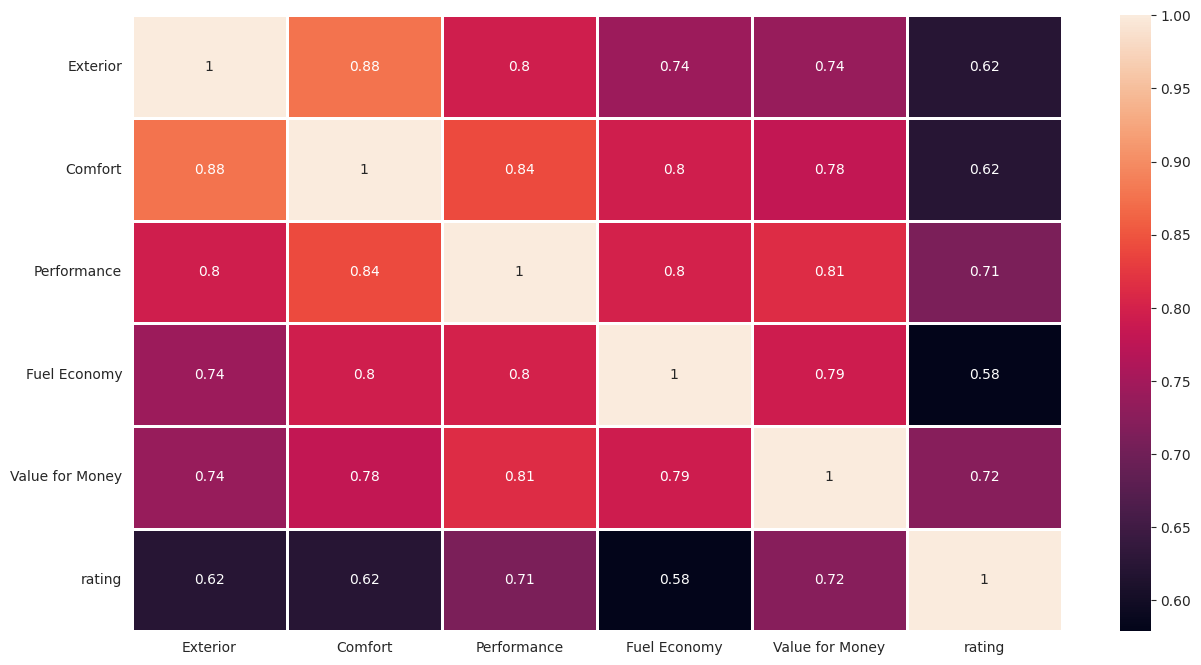

In [ ]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(review.corr(),linewidths=1,linecolor='white',annot=True)

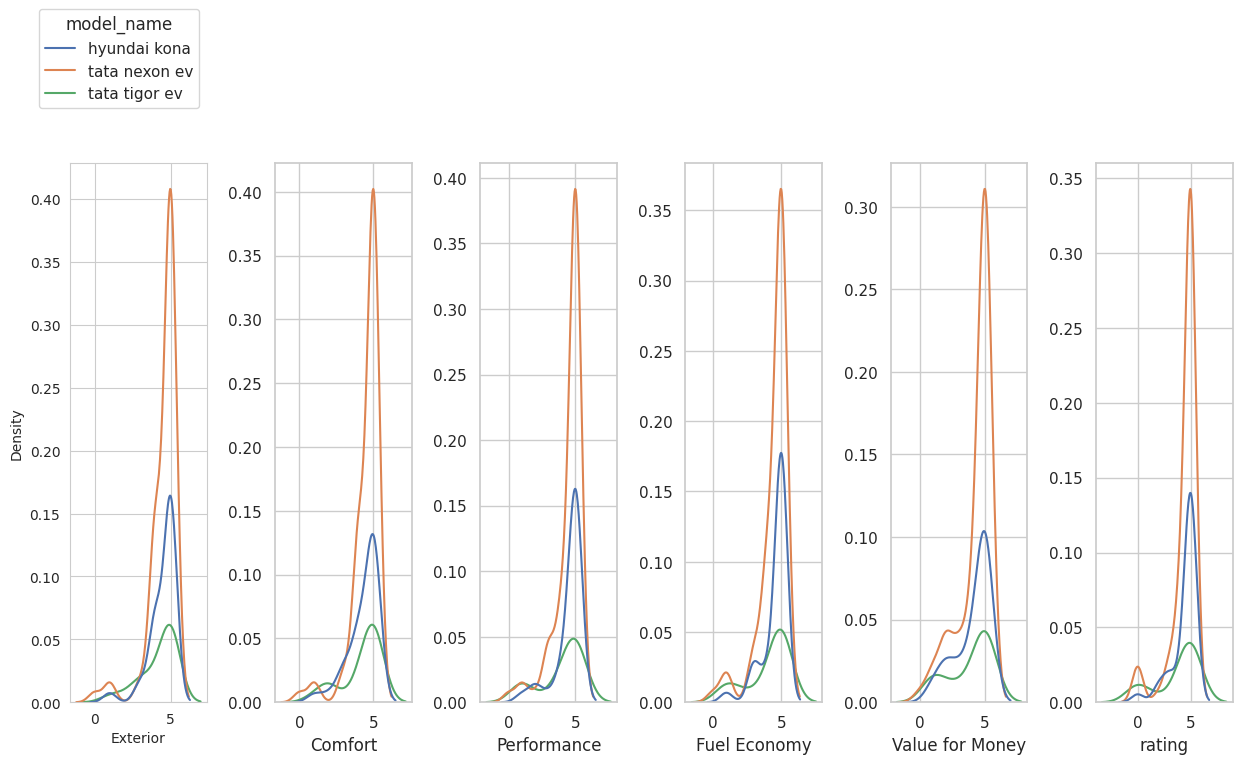

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Exterior','Comfort','Performance','Fuel Economy','Value for Money','rating']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)

  ax = sns.kdeplot(x= cols,  hue='model_name',data=review_clnd,legend=True if n==1 else False)
  if n==1:
    sns.move_legend(ax, "upper right",bbox_to_anchor=(1, 1.3))

  plt.ylabel("Density" if n==1 else '')






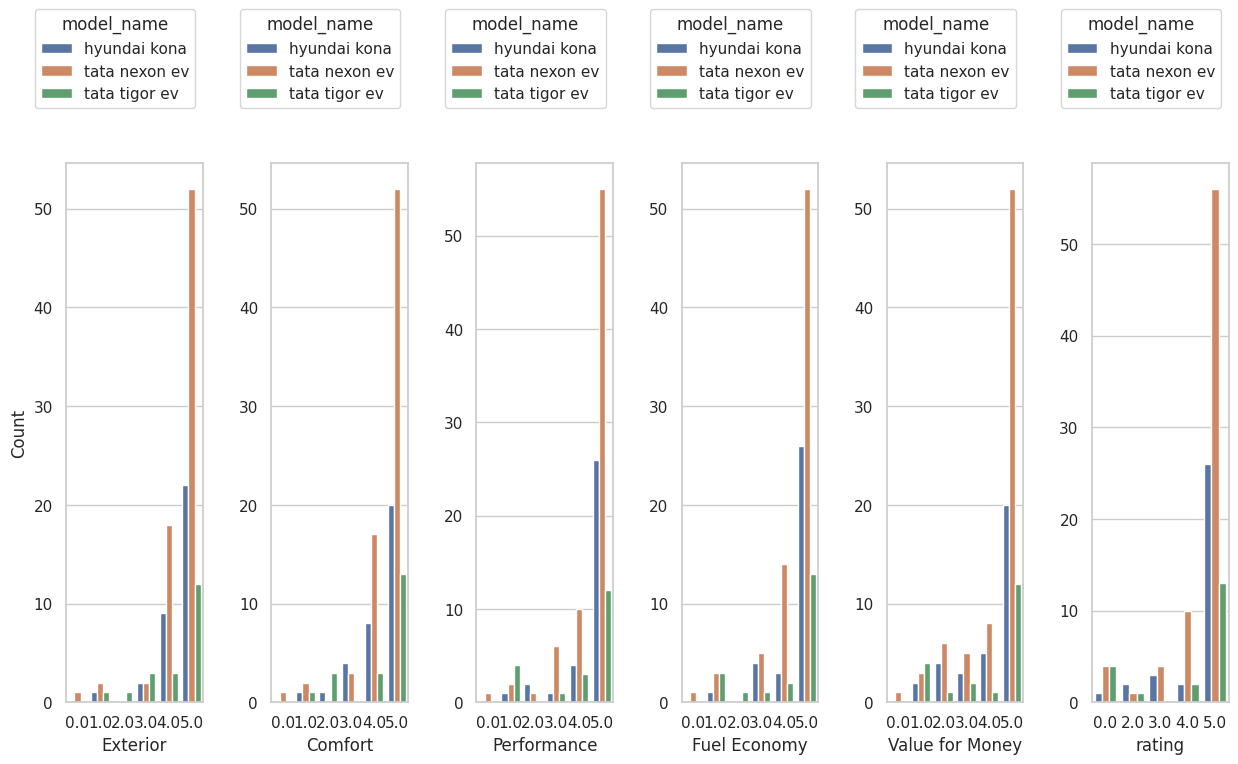

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Exterior','Comfort','Performance','Fuel Economy','Value for Money','rating']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)

  ax = sns.countplot(x= cols,  hue='model_name',data=review_clnd)

  sns.move_legend(ax, "upper right",bbox_to_anchor=(1, 1.3))

  plt.ylabel("Count" if n==1 else '')


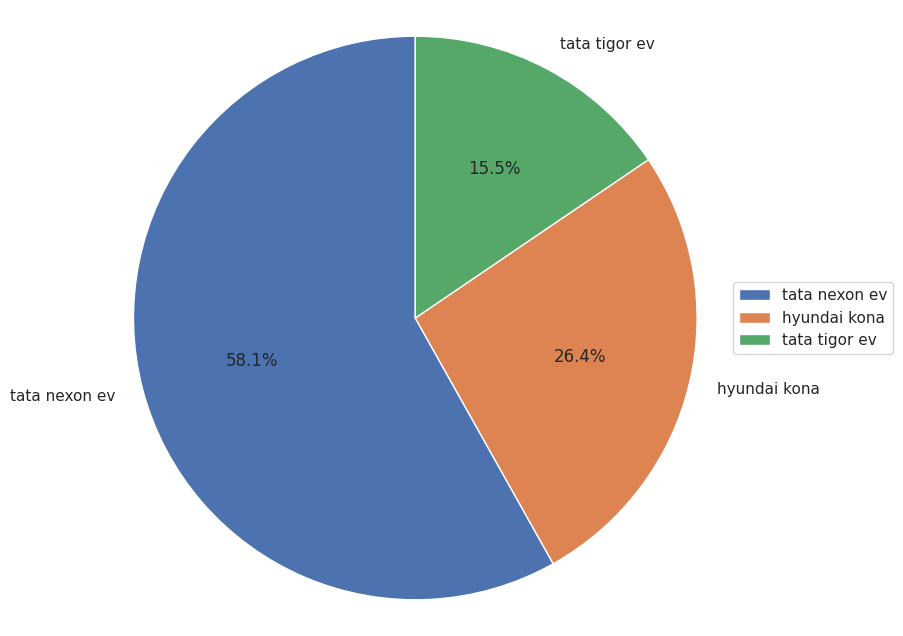

In [ ]:
plt.figure(figsize=(8, 8))  # Adjust the figure size for a circular plot
model_counts = review_clnd['model_name'].value_counts()
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ensure the pie chart is circular
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

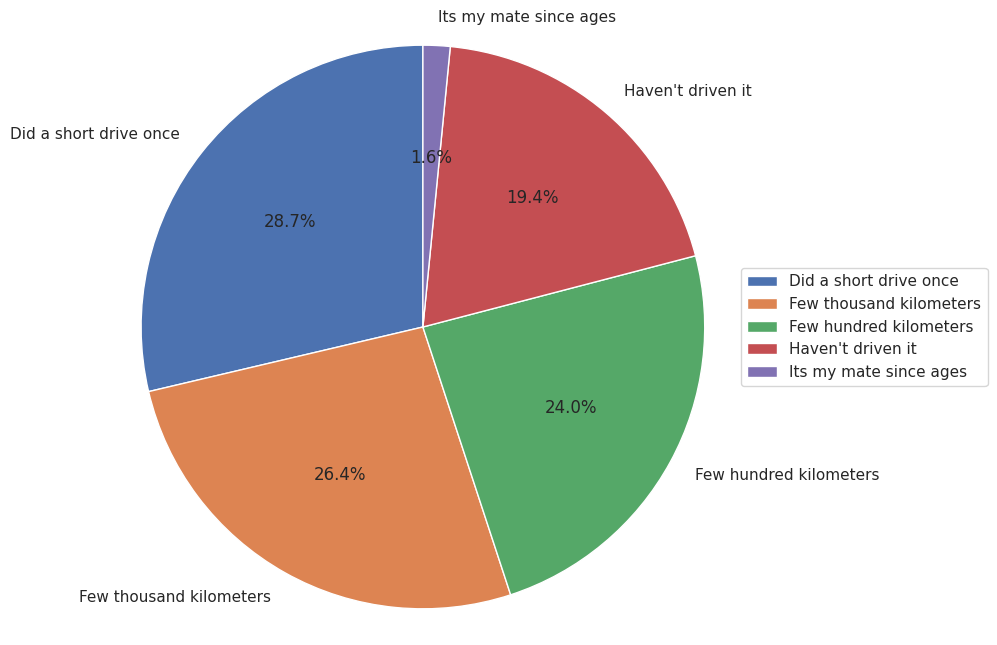

In [ ]:
plt.figure(figsize=(8, 8))  # Adjust the figure size for a circular plot
driven_counts = review_data['driven'].value_counts()
plt.pie(driven_counts, labels=driven_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ensure the pie chart is circular
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

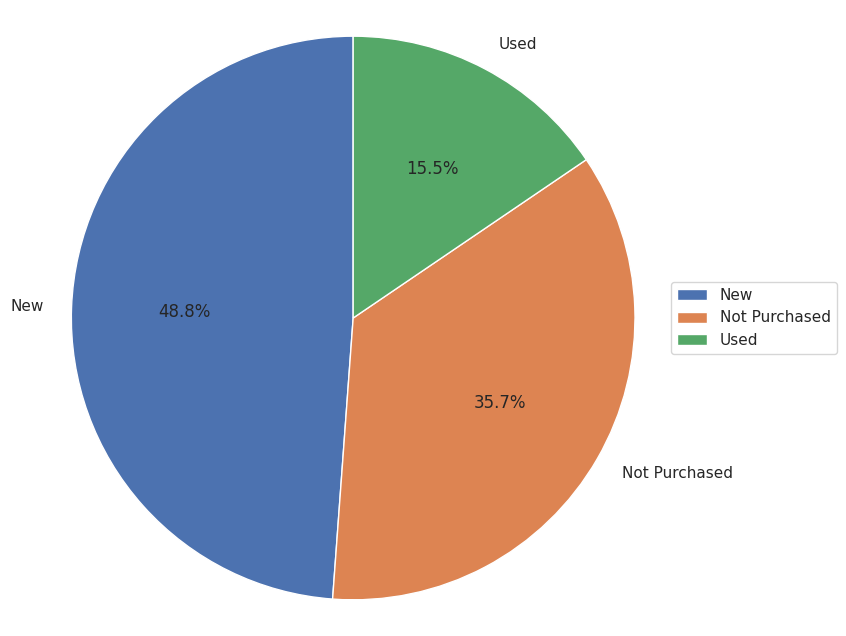

In [ ]:
plt.figure(figsize=(8, 8))  # Adjust the figure size for a circular plot
pur_counts = review_data['Condition'].value_counts()
plt.pie(pur_counts, labels=pur_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ensure the pie chart is circular
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Findings ⏫
*   EV are mostly being used for Short to mid distance travel - **28.7%**
*   There are significant amount of users who are using it for large distance  **26.4%**
*   There are still large population who haven't purchased EV yet but may have driven it and satisfied and comparing with ratings given It appears they are willing to adopt-  **35.7 %**


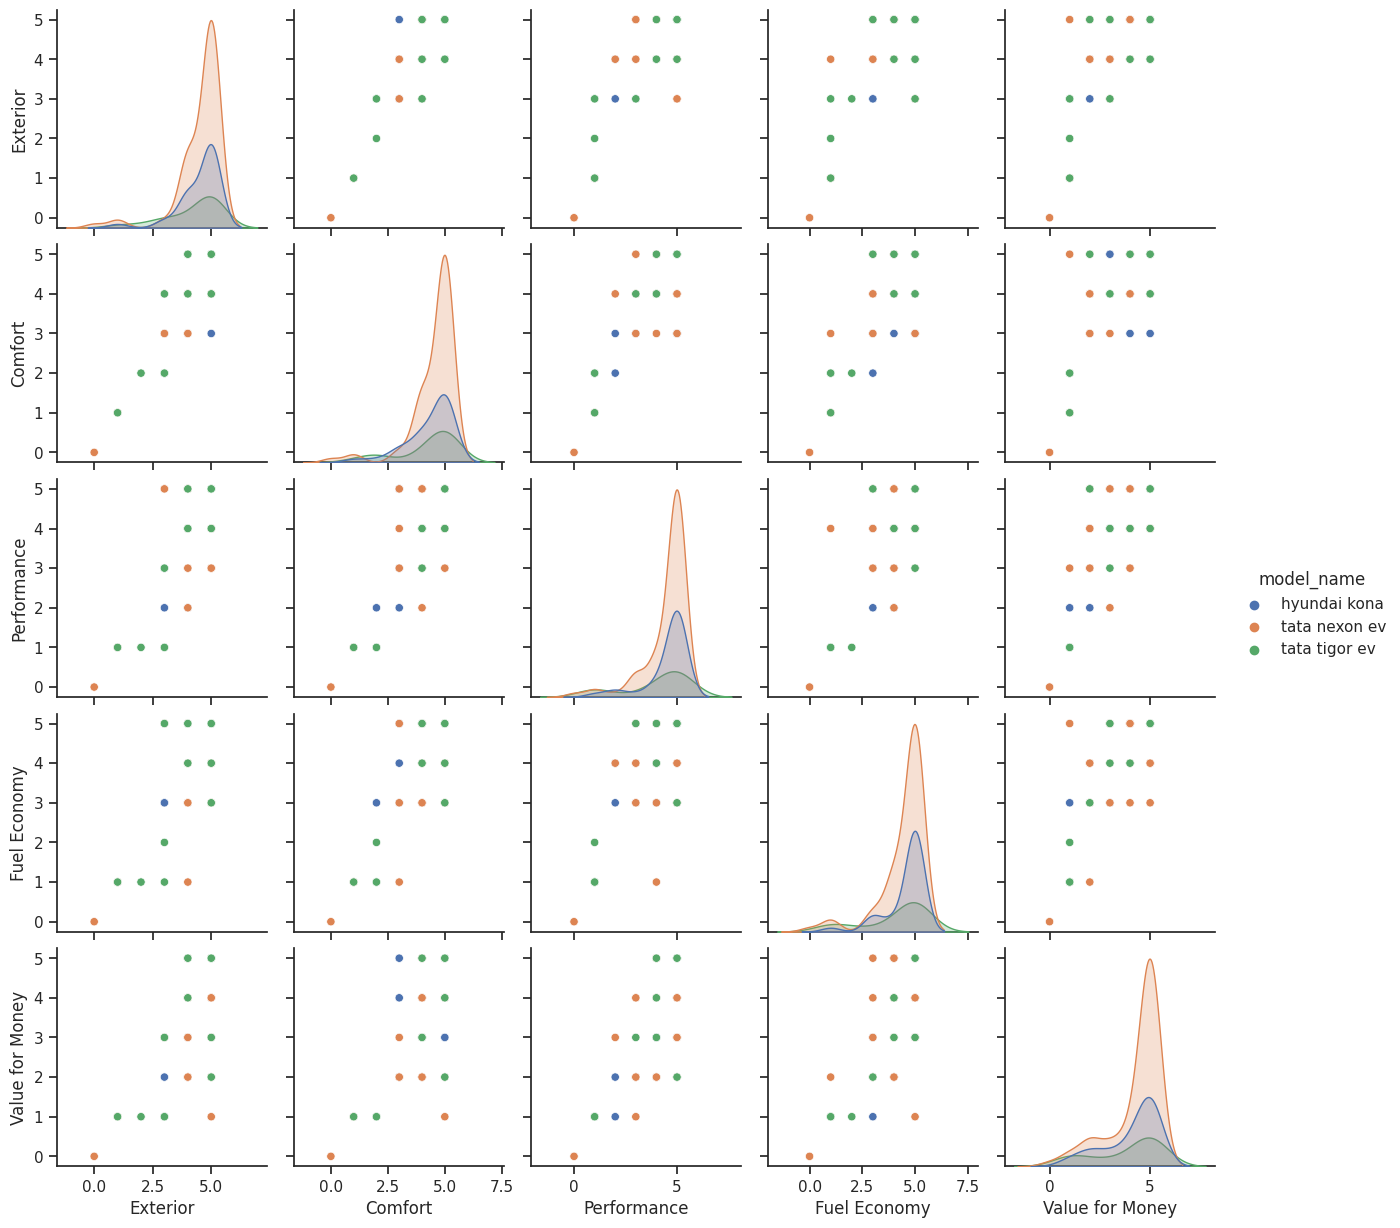

In [ ]:
features= ['Exterior','Comfort','Performance','Fuel Economy','Value for Money']
sns.set(style='ticks')  # Set the style of the plots
sns.pairplot(review_clnd[features+['model_name']], diag_kind='kde',hue='model_name')

In [ ]:
review_clnd.shape

(129, 8)

In [ ]:
average_rating_model = review_clnd.groupby('model_name')[features].mean()
average_rating_model

,Exterior,Comfort,Performance,Fuel Economy,Value for Money
model_name,,,,,
hyundai kona,4.500000,4.323529,4.529412,4.558824,4.088235
tata nexon ev,4.533333,4.520000,4.493333,4.453333,4.293333
tata tigor ev,4.200000,4.200000,3.950000,4.050000,3.800000


### Findings ⏫


*   **Tata nexon** EV has largest market presence.
*   **Tata Nexon EV** is best performing vehicle achieving highest average ratings over all
*   **Tata Tigor EV** has lowest market presence and poorest performer in consumer satisfaction
*   **Hundai kona** is also competetive vehicle but with lower presence


In [ ]:
review_pc = review_clnd
features = ['Exterior','Comfort','Performance','Fuel Economy','Value for Money']
pca = PCA(n_components =5)
components = pca.fit_transform(review_pc[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=review_pc["model_name"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
pca = PCA()
EVR_pca = pca.fit_transform(review_pc[features])

row= ['stddev','prop_var','cum_var']
Compon = [np.sqrt(pca.explained_variance_),pca.explained_variance_ratio_,np.cumsum(pca.explained_variance_ratio_)]


principal_components_df = pd.DataFrame(data=Compon, columns=[f"PC{i+1}" for i in range(EVR_pca.shape[1])], index=row)


print(principal_components_df)

               PC1       PC2       PC3       PC4       PC5
stddev    2.318130  0.634648  0.536859  0.471836  0.343938
prop_var  0.838905  0.062879  0.044994  0.034755  0.018467
cum_var   0.838905  0.901783  0.946778  0.981533  1.000000


In [ ]:
factor_loadings = pca.components_

# Create a DataFrame to store the factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings, columns=principal_components_df.columns, index =features)
factor_loadings_df

,PC1,PC2,PC3,PC4,PC5
Exterior,-0.370159,-0.413099,-0.461816,-0.437811,-0.536078
Comfort,0.504832,0.423520,0.133287,-0.063993,-0.737506
Performance,0.269510,0.139751,0.080588,-0.880245,0.355679
Fuel Economy,0.385271,0.193792,-0.865190,0.152519,0.205413
Value for Money,0.622139,-0.769997,0.117949,0.078310,-0.001794


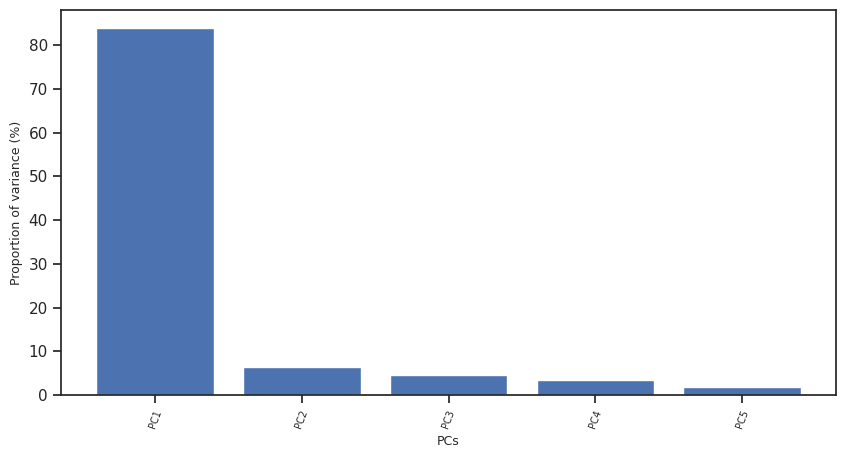

In [ ]:
principal_axes = pca.components_
cluster.screeplot(obj=[factor_loadings_df.columns, pca.explained_variance_ratio_],show=True,dim=(10,5))

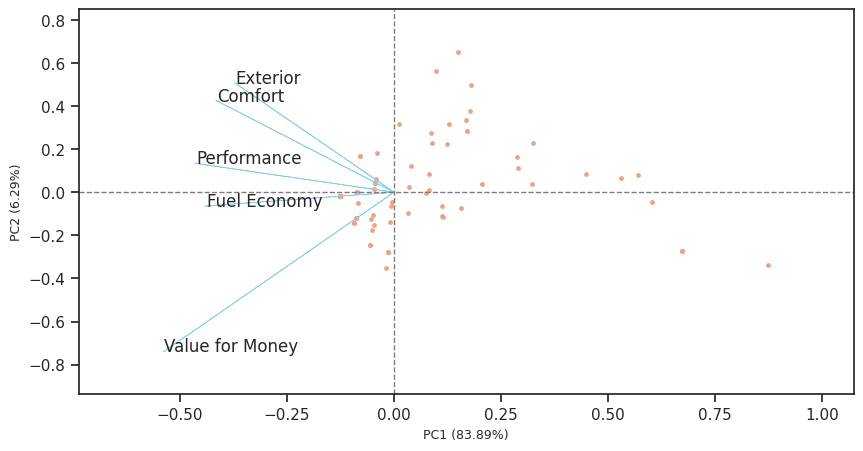

In [ ]:
pca_scores = PCA().fit_transform(review_pc[features])
principal_axes=pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=principal_axes, labels=features, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

### Findings ⏫

*   PC1 Captures 83% information of segment variables
*   Attribute Value for money plays key role in evaluating EV adoption

# <font> Extracting Segments </font>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

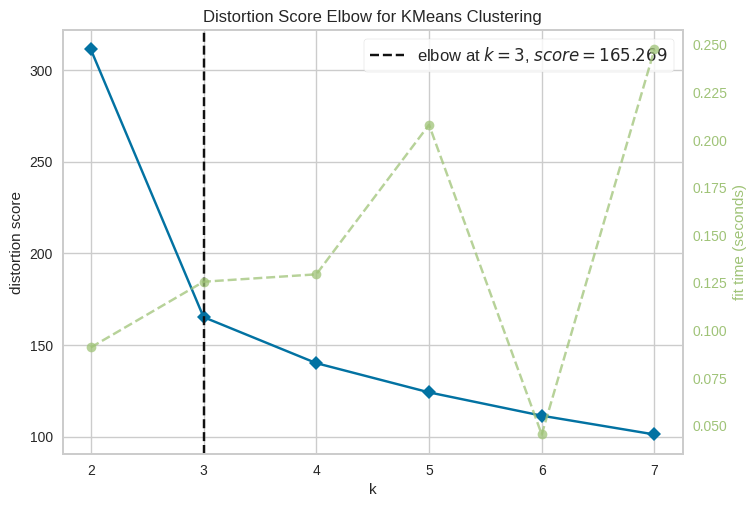

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))        #Calculate optimal number of clusters

visualizer.fit(review_pc[features])        # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_model.fit_predict(review_pc[features])
review_clnd['cluster_num'] = kmeans_model.labels_ #adding to df
review_clnd.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,rating,model_name,cluster_num
0,5.0,4.0,5.0,5.0,5.0,New,5.0,hyundai kona,0
1,1.0,1.0,1.0,1.0,1.0,New,0.0,hyundai kona,1
2,4.0,5.0,5.0,5.0,4.0,New,5.0,hyundai kona,0
3,5.0,5.0,5.0,5.0,5.0,New,5.0,hyundai kona,0
4,4.0,4.0,5.0,3.0,2.0,Not Purchased,3.0,hyundai kona,2


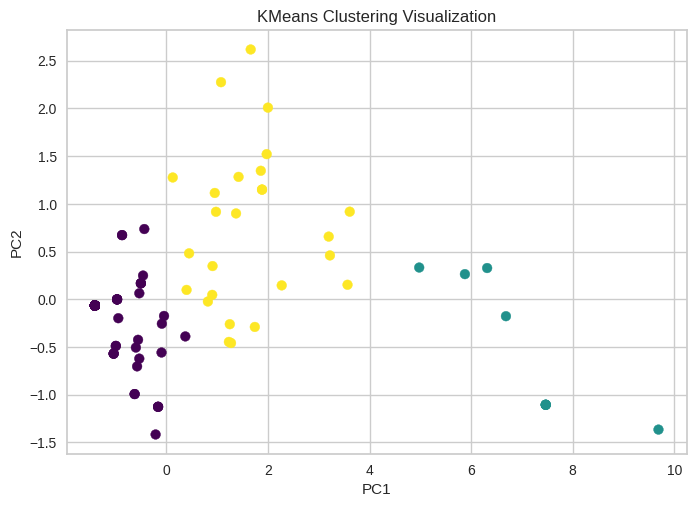

In [ ]:
pca_data = preprocessing.scale(review_clnd[features])
pca = PCA(n_components=5)
pc = pca.fit_transform(review_clnd[features])
names = ['pc1','pc2','pc3','pc4','pc5']
pf = pd.DataFrame(data = pc, columns = names)
pf['cluster_num'] = kmeans_model.labels_



plt.scatter(pf['pc1'], pf['pc2'], c=kmeans_model.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering Visualization')
plt.legend()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram       #to visualize hierarchical association of clusters
distance_matrix = np.array(review_clnd[features])
distance_matrix =distance_matrix .T
Z = linkage(distance_matrix, method='ward')  # 'ward' linkage uses Ward's minimum variance method

Z.shape

(4, 4)

In [ ]:
evr_x_T=review_clnd[features].T
evr_x_T.index.shape

(5,)

In [ ]:
evr_x_T

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
Exterior,5.0,1.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,3.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0
Comfort,4.0,1.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,...,2.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0
Performance,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0
Fuel Economy,5.0,1.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,3.0
Value for Money,5.0,1.0,4.0,5.0,2.0,4.0,5.0,5.0,5.0,5.0,...,1.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,2.0


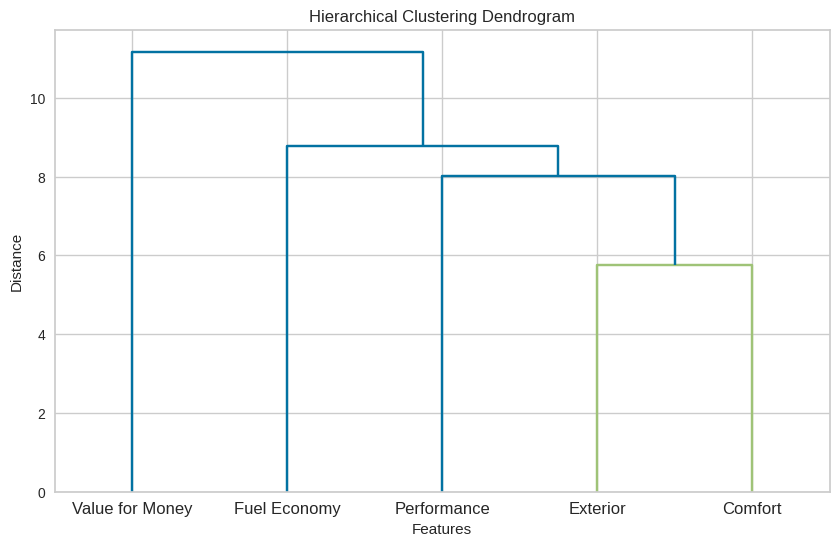

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=evr_x_T.index, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

<font color> Profiling Segments</font>

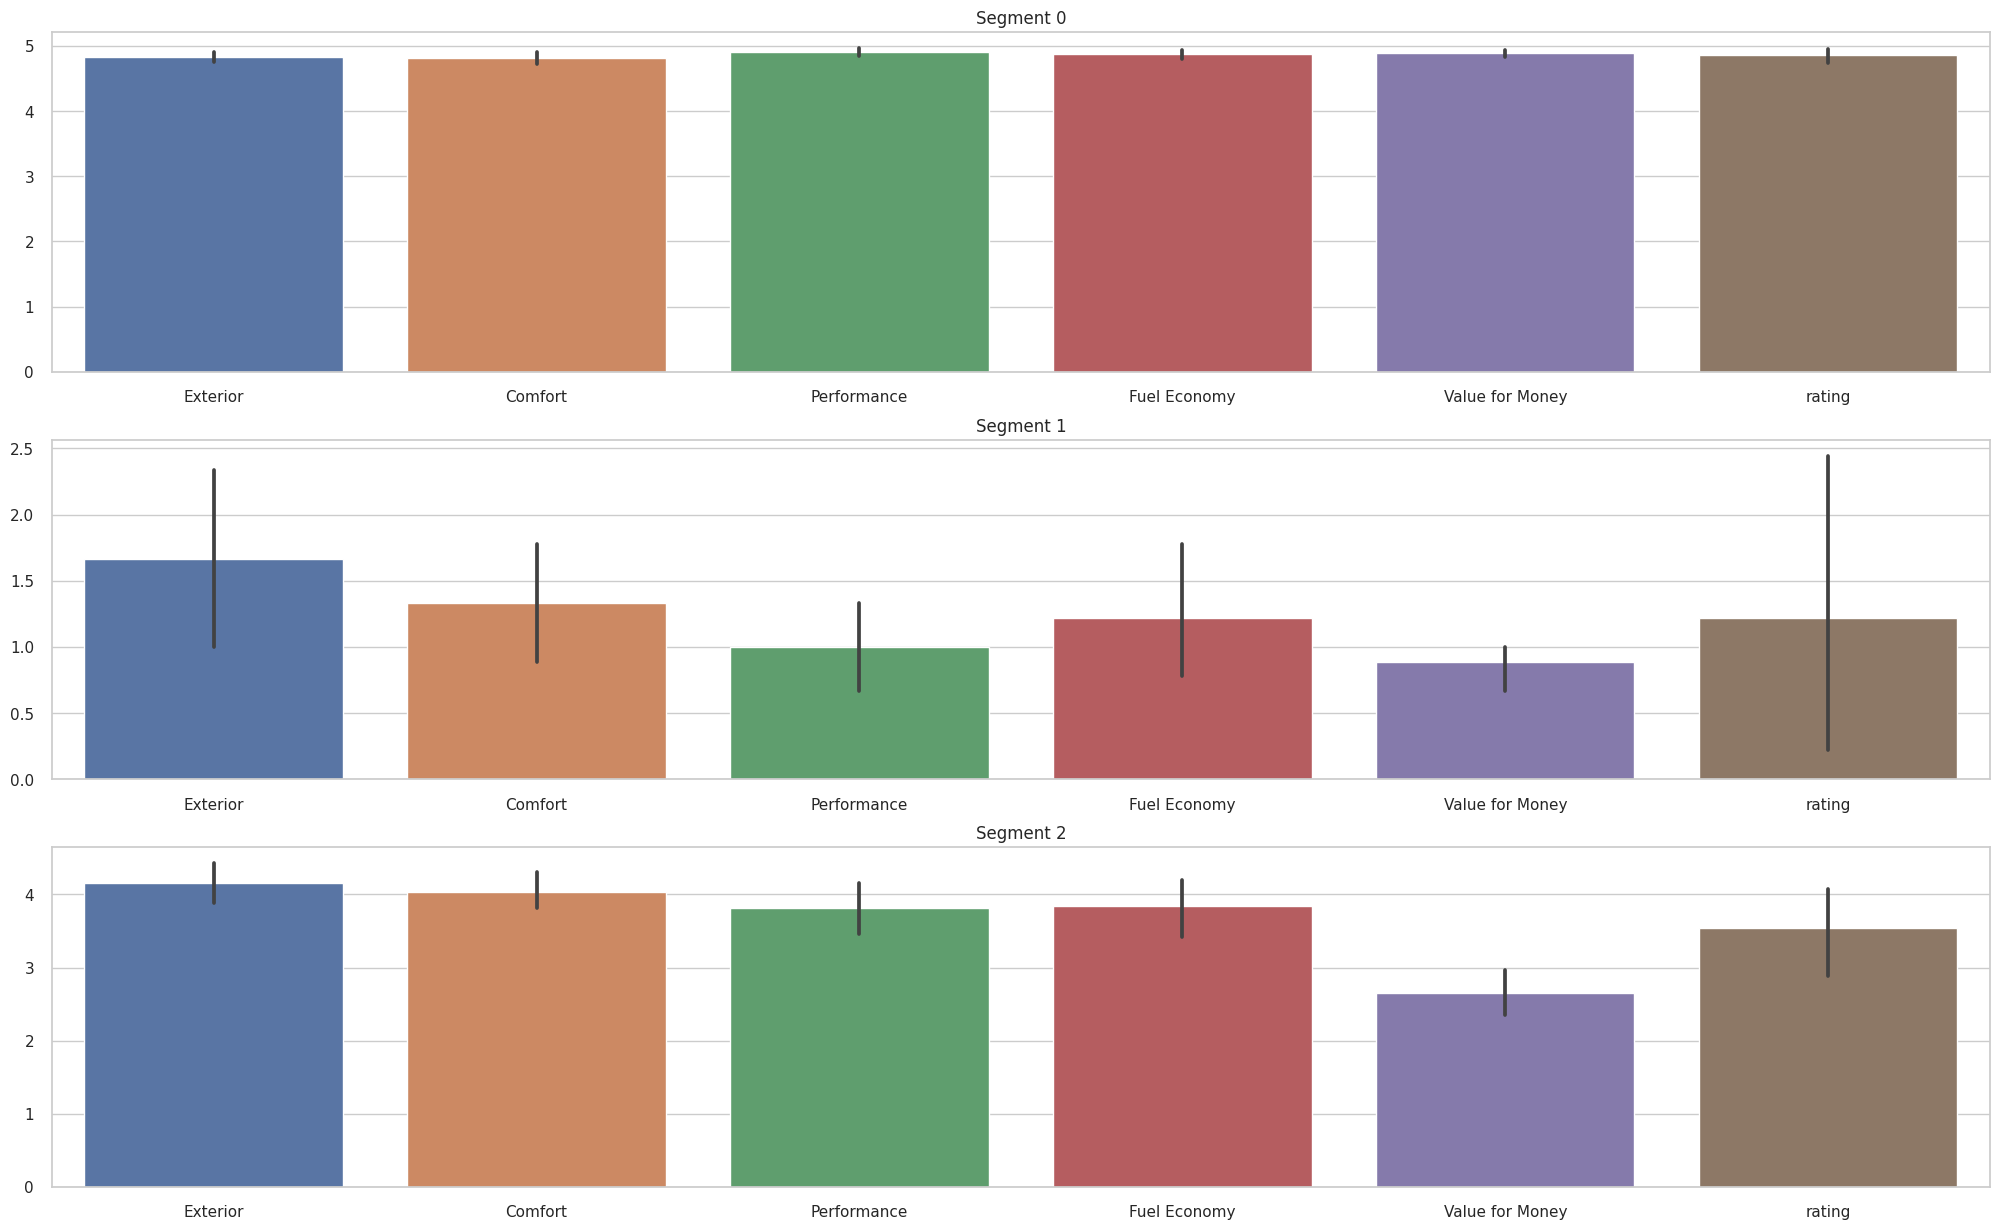

In [ ]:
sns.set(style="whitegrid")

# Create a 1x2 panel plot for two segments
nrows,ncols = 3,1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))

# Flatten axes to loop through them easily
axes_flat = axes.flatten()

# List of unique segment values
segments = review_clnd['cluster_num'].unique()

# Create a bar plot for each segment
for segment, ax in zip(segments, axes_flat):
    segment_data = review_clnd[review_clnd['cluster_num'] == segment]
    sns.barplot(data=segment_data.iloc[:,:-1], ax=ax)
    ax.set_title(f'Segment {segment}')

# Adjust layout and show the plot

plt.show()

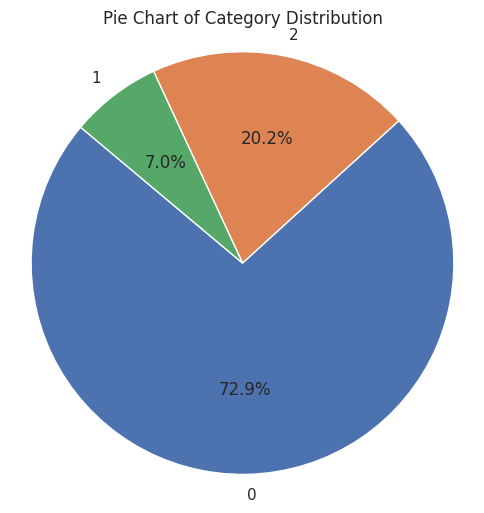

In [ ]:
category_counts = review_clnd['cluster_num'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
average_cluster_model = review_clnd.groupby('cluster_num')[features].mean()
average_cluster_model

,Exterior,Comfort,Performance,Fuel Economy,Value for Money
cluster_num,,,,,
0,4.829787,4.819149,4.914894,4.882979,4.893617
1,1.666667,1.333333,1.000000,1.222222,0.888889
2,4.153846,4.038462,3.807692,3.846154,2.653846


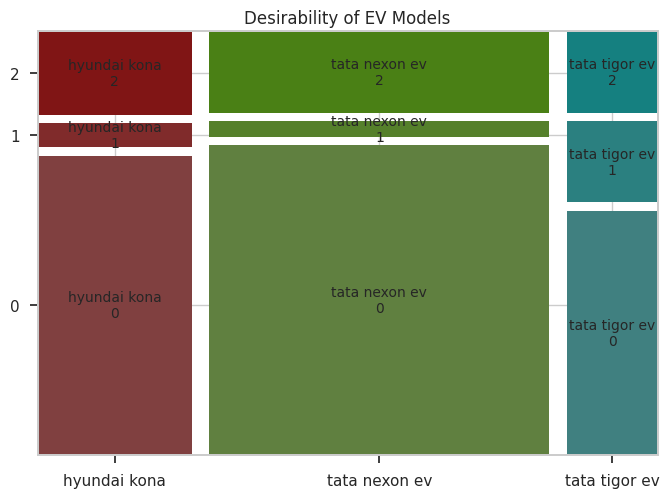

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(review_clnd, ['model_name', 'cluster_num'], gap=0.03, title='Desirability of EV Models')

plt.show()

### Segment profiles ▶


1.   Segment 0 : High satisfaction on every aspect ,indicates higher willing to adoption of EV, forms most of the population - **72.9%**; Most desired EV is **Tata Nexon** ;These are **Early majority**
2.   Segment 1 : Unsatisfied on all aspects, didn't find EV to be value for money ; forms **7%** of population ; Found **Tata tigor EV ** to be most likeable; can be considered **Late adapters**.
3.   Segment 2: They liked **Exterior** and **Comfort** of EVs but didn't find it Value for money much;form 20.2% population ;Found each EV equally likeable;can be considered **Early adaptors**



# <font>Data Exploration on Buying behaviour</font>

In [ ]:
buy_beh_data.head(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
for column in buy_beh_data.columns:
    distinct_values = buy_beh_data[column].unique()
    print(f"Column '{column}' has {len(distinct_values)} distinct values:")
    print(distinct_values)
    print()

Column 'Age' has 22 distinct values:
[27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]

Column 'Profession' has 2 distinct values:
['Salaried' 'Business']

Column 'Marrital Status' has 2 distinct values:
['Single' 'Married']

Column 'Education' has 2 distinct values:
['Post Graduate' 'Graduate']

Column 'No of Dependents' has 4 distinct values:
[0 2 4 3]

Column 'Personal loan' has 2 distinct values:
['Yes' 'No']

Column 'House Loan' has 2 distinct values:
['No' 'Yes']

Column 'Wife Working' has 2 distinct values:
['No' 'Yes']

Column 'Salary' has 24 distinct values:
[ 800000 1400000 1800000 1600000  900000 1200000 2000000 1300000 2500000
 1700000 1100000 1900000 2100000 2400000 2200000  200000 1500000 2700000
 2900000 3100000 2600000 2300000 2800000 3800000]

Column 'Wife Salary' has 14 distinct values:
[      0  600000  800000  700000  400000 2000000  500000 1000000 1100000
  900000 1300000 1400000 1800000 2100000]

Column 'Total Salary' has 36 distinct values:
[ 80

In [ ]:
buy_beh_data.describe(include='all').round(2)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
count,99.00,99,99,99,99.00,99,99,99,99.00,99.00,99.00,99,99.00
unique,NaN,2,2,2,NaN,2,2,2,NaN,NaN,NaN,9,NaN
top,NaN,Salaried,Married,Post Graduate,NaN,No,No,Yes,NaN,NaN,NaN,SUV,NaN
freq,NaN,64,84,56,NaN,67,62,52,NaN,NaN,NaN,19,NaN
mean,36.31,NaN,NaN,NaN,2.18,NaN,NaN,NaN,1736363.64,534343.43,2270707.07,NaN,1194040.40
std,6.25,NaN,NaN,NaN,1.34,NaN,NaN,NaN,673621.73,605444.96,1050777.41,NaN,437695.54
min,26.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,200000.00,0.00,200000.00,NaN,110000.00
25%,31.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1300000.00,0.00,1550000.00,NaN,800000.00
50%,36.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1600000.00,500000.00,2100000.00,NaN,1200000.00
75%,41.00,NaN,NaN,NaN,3.00,NaN,NaN,NaN,2200000.00,900000.00,2700000.00,NaN,1500000.00


### **Observation :**  
*   On average Consumer is **36 years** old **Salaried** professional,**Married** ,having **higher education** with **2 dependents**, **No ongoing loans**, **having a working wife**, earning household income of **22 Lacs** , Opting for **SUV** pricing upto **12 lacs**


In [ ]:
buy_beh_data.corr()

<ipython-input-47-50492b62249a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630
Wife Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858
Total Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000


<ipython-input-48-f8f9a0e11297>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

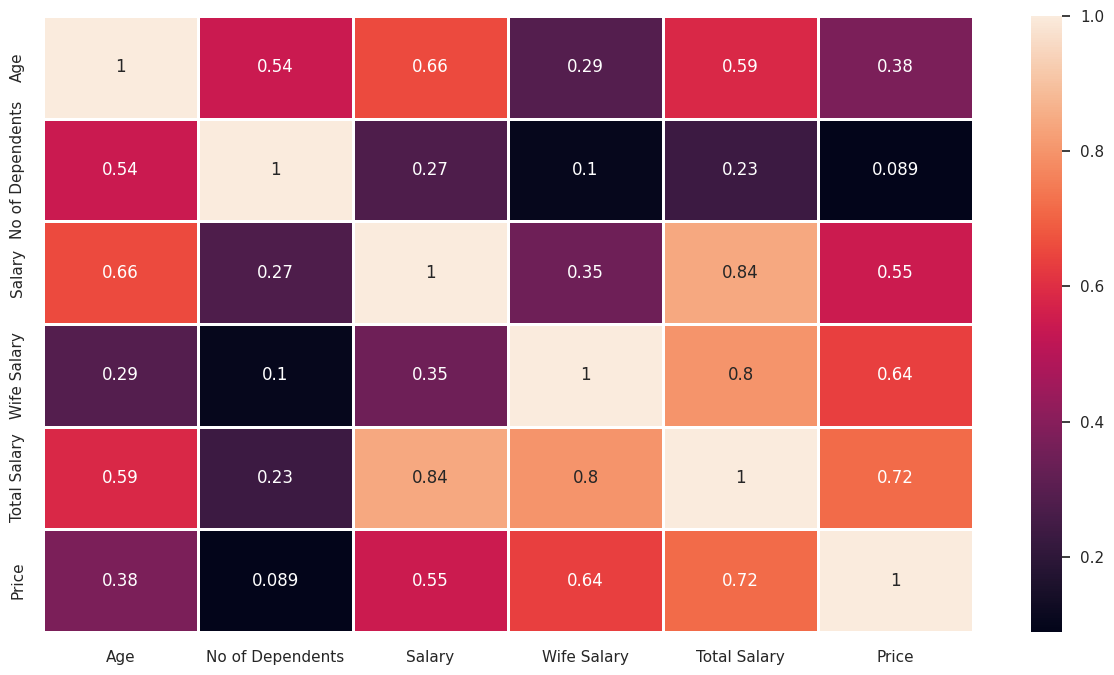

In [ ]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(buy_beh_data.corr(),linewidths=1,linecolor='white',annot=True)

### Finding ⏬
*   Price of car purchased is highly correlated with Total salary
*   No. of dependents play no role in deciding price of car to purchase or even make.
*   Age is somewhat related to Salary earned but not so much to the caprice.


In [ ]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price'))

fig.add_trace(go.Violin(y=buy_beh_data['Age'], x=buy_beh_data['Make']),
              row=1, col=1)

fig.add_trace(go.Violin(y=buy_beh_data['No of Dependents'], x=buy_beh_data['Make']),
              row=1, col=2)

fig.add_trace(go.Violin(y=buy_beh_data['Salary'], x=buy_beh_data['Make']),
              row=2, col=1)

fig.add_trace(go.Violin(y=buy_beh_data['Wife Salary'], x=buy_beh_data['Make']),
              row=2, col=2)

fig.add_trace(go.Violin(y=buy_beh_data['Total Salary'], x=buy_beh_data['Make']),
              row=3, col=1)

fig.add_trace(go.Violin(y=buy_beh_data['Price'], x=buy_beh_data['Make']),
              row=3, col=2)

fig.update_layout(height=1500, width=1500,
                  title_text="Multiple Subplots with Titles")

fig.show()













### Findings ⏬
*   Younger people Mostly opt for Hatchbacks like Baleno or i20 and some go for Sedans ,there is small population of youngsters who also go for Suv but none go for Luxury

*   Higher Age people mostly opt for Luxury of Premium Sedans like Ciaz.

*   People who Earn Higher salary go for SUVs or Luxury.

*   i20 and Baleno (Hatchbacks) are most popular vehicle of Lower income group.

*   When Wife's salary is also high and resultantly Total salary also hikes up ,choice of vehicles becomes Luxary and SUVs

*   Luxary segment has highest market price and Baleno has lowest.

In [ ]:


# Create hierarchy plot

fig = px.sunburst(buy_beh_data, path=['Profession', 'Marrital Status', 'Education','Make'], values='Price')
fig.show()





### Findings ⏬


*   **SUVs holds most of the market capital** with their primary Customers being **Post Graduate ,High Income Married , Salaried Professionals with Working wife**; **Singles** of this group prefer **City or Creta** (Sedan/Compact SUV)
*   Second Fav Vehicle in this segment is **Creta**
*   **Highly Educated Married Businessmen** Prefer **Hatchback &sedan** whereas Single of this catagory also prefer SUV
*   Overall Post graduates Salaried Professionals prefer SUV and Businessmen prefer Baleno So we can say These two are most popular catagories.
*   Overall Graduates Salaried Professionals prefer Ciaz and Businessmen prefer SUV So we can say These two are most popular catagories.
* Overall Most Popular vehicle segments in decreasing order are : **Suv** > **Baleno(Hatchback)** > **CIAZ(Premium sedan)**



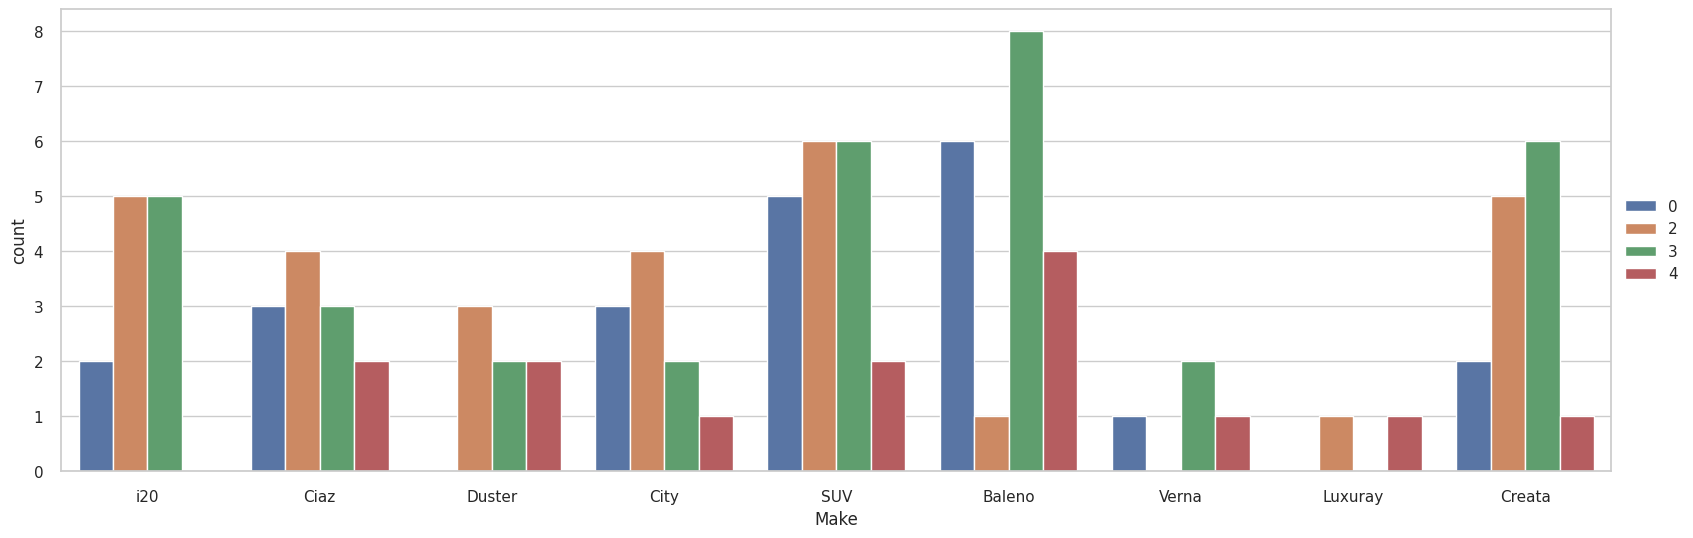

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=buy_beh_data, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

catg_df = buy_beh_data[['Education','Profession','Marrital Status','Personal loan','House Loan','Wife Working']]
# Create a LabelEncoder instance to convert Catagorical data into numerical
label_encoder = LabelEncoder()
cols = ['Education','Profession','Marrital Status','Personal loan','House Loan','Wife Working']
for column in cols:
    catg_df[column] = label_encoder.fit_transform(buy_beh_data[column])

# Display the encoded DataFrame
catg_df.head()


<ipython-input-52-013a0e9d4f69>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-013a0e9d4f69>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-013a0e9d4f69>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-013a0e9

,Education,Profession,Marrital Status,Personal loan,House Loan,Wife Working
0,1,1,1,1,0,0
1,1,1,0,1,1,1
2,0,0,0,1,1,0
3,1,0,0,0,0,1
4,1,1,0,1,0,1


In [ ]:
features_to_norm= buy_beh_data[['Age', 'Salary','Wife Salary' ,'Total Salary','Price']]  # Example features

scaler =  MinMaxScaler()      #Normalising Data

# Fit the scaler on the data and transform the features
scaled_features = scaler.fit_transform(features_to_norm)

# Create a new DataFrame with the scaled features
num_df = pd.DataFrame(scaled_features, columns=features_to_norm.columns)

# Now, scaled_df contains the scaled features
num_df

,Age,Salary,Wife Salary,Total Salary,Price
0,0.04,0.166667,0.000000,0.12,0.238754
1,0.36,0.333333,0.285714,0.36,0.307958
2,0.76,0.444444,0.000000,0.32,0.377163
3,0.60,0.388889,0.285714,0.40,0.377163
4,0.20,0.444444,0.380952,0.48,0.515571
...,...,...,...,...,...
94,0.04,0.611111,0.000000,0.44,0.515571
95,0.96,1.000000,0.619048,0.98,0.515571
96,1.00,0.555556,0.000000,0.40,0.342561
97,1.00,0.694444,0.619048,0.76,0.480969


# **<font> Extracting Segments</font>**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

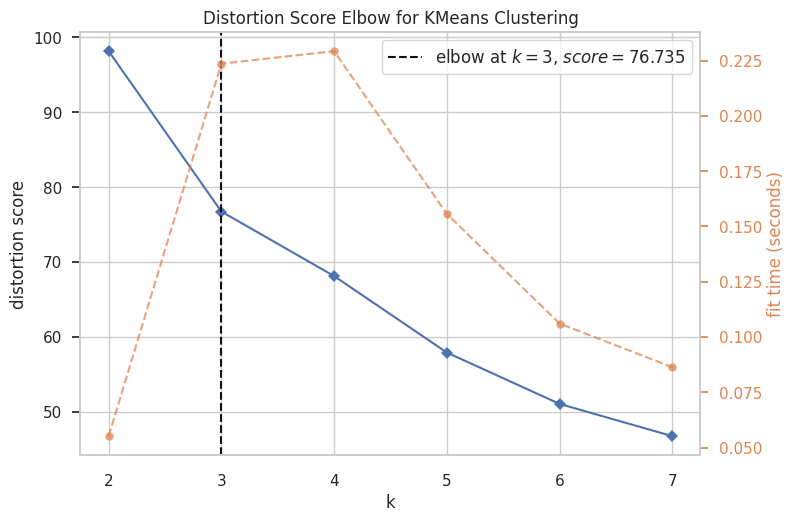

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))

visualizer.fit(catg_df)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_model.fit_predict(catg_df)
catg_df['cluster_num'] = kmeans_model.labels_ #adding to df
catg_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-55-c6d6e91c0da9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Education,Profession,Marrital Status,Personal loan,House Loan,Wife Working,cluster_num
0,1,1,1,1,0,0,1
1,1,1,0,1,1,1,2
2,0,0,0,1,1,0,2
3,1,0,0,0,0,1,0
4,1,1,0,1,0,1,0


Labels -
Education :  Post graduate = 1, Graduate = 0 Profession : Salaried = 1, Businessman = 0
Marital Status : Single =1, Married =0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

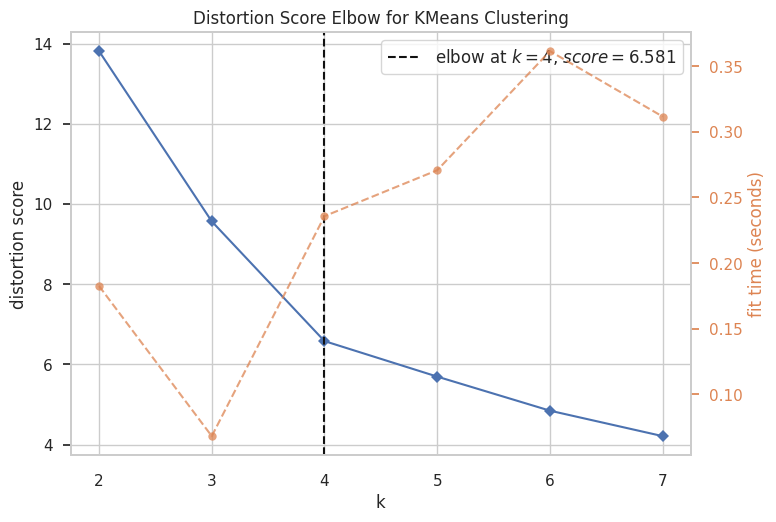

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(2,8))

visualizer.fit(num_df)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_model.fit_predict(num_df)
num_df['cluster_num'] = kmeans_model.labels_ #adding to df
num_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Age,Salary,Wife Salary,Total Salary,Price,cluster_num
0,0.04,0.166667,0.000000,0.12,0.238754,0
1,0.36,0.333333,0.285714,0.36,0.307958,1
2,0.76,0.444444,0.000000,0.32,0.377163,3
3,0.60,0.388889,0.285714,0.40,0.377163,1
4,0.20,0.444444,0.380952,0.48,0.515571,1


# <font color= #5f9c36> Profiling Segment</font>


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
feature1= 	['Education','Profession','Marrital Status','Personal loan','House Loan','Wife Working']
distance_matrix = np.array(catg_df[feature1])
distance_matrix =distance_matrix .T
Z = linkage(distance_matrix, method='ward')  # 'ward' linkage uses Ward's minimum variance method

Z.shape

(5, 4)

In [ ]:
Ele_x_T=catg_df[feature1].T
Ele_x_T.index.shape

(6,)

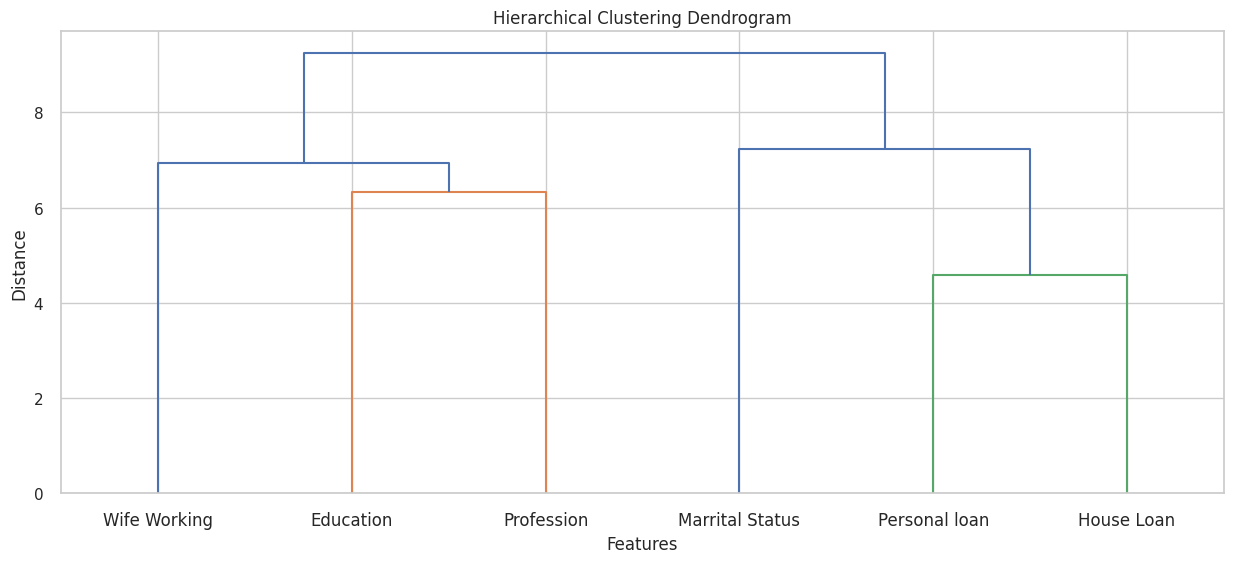

In [ ]:
plt.figure(figsize=(15, 6))
dendrogram(Z, labels=Ele_x_T.index, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

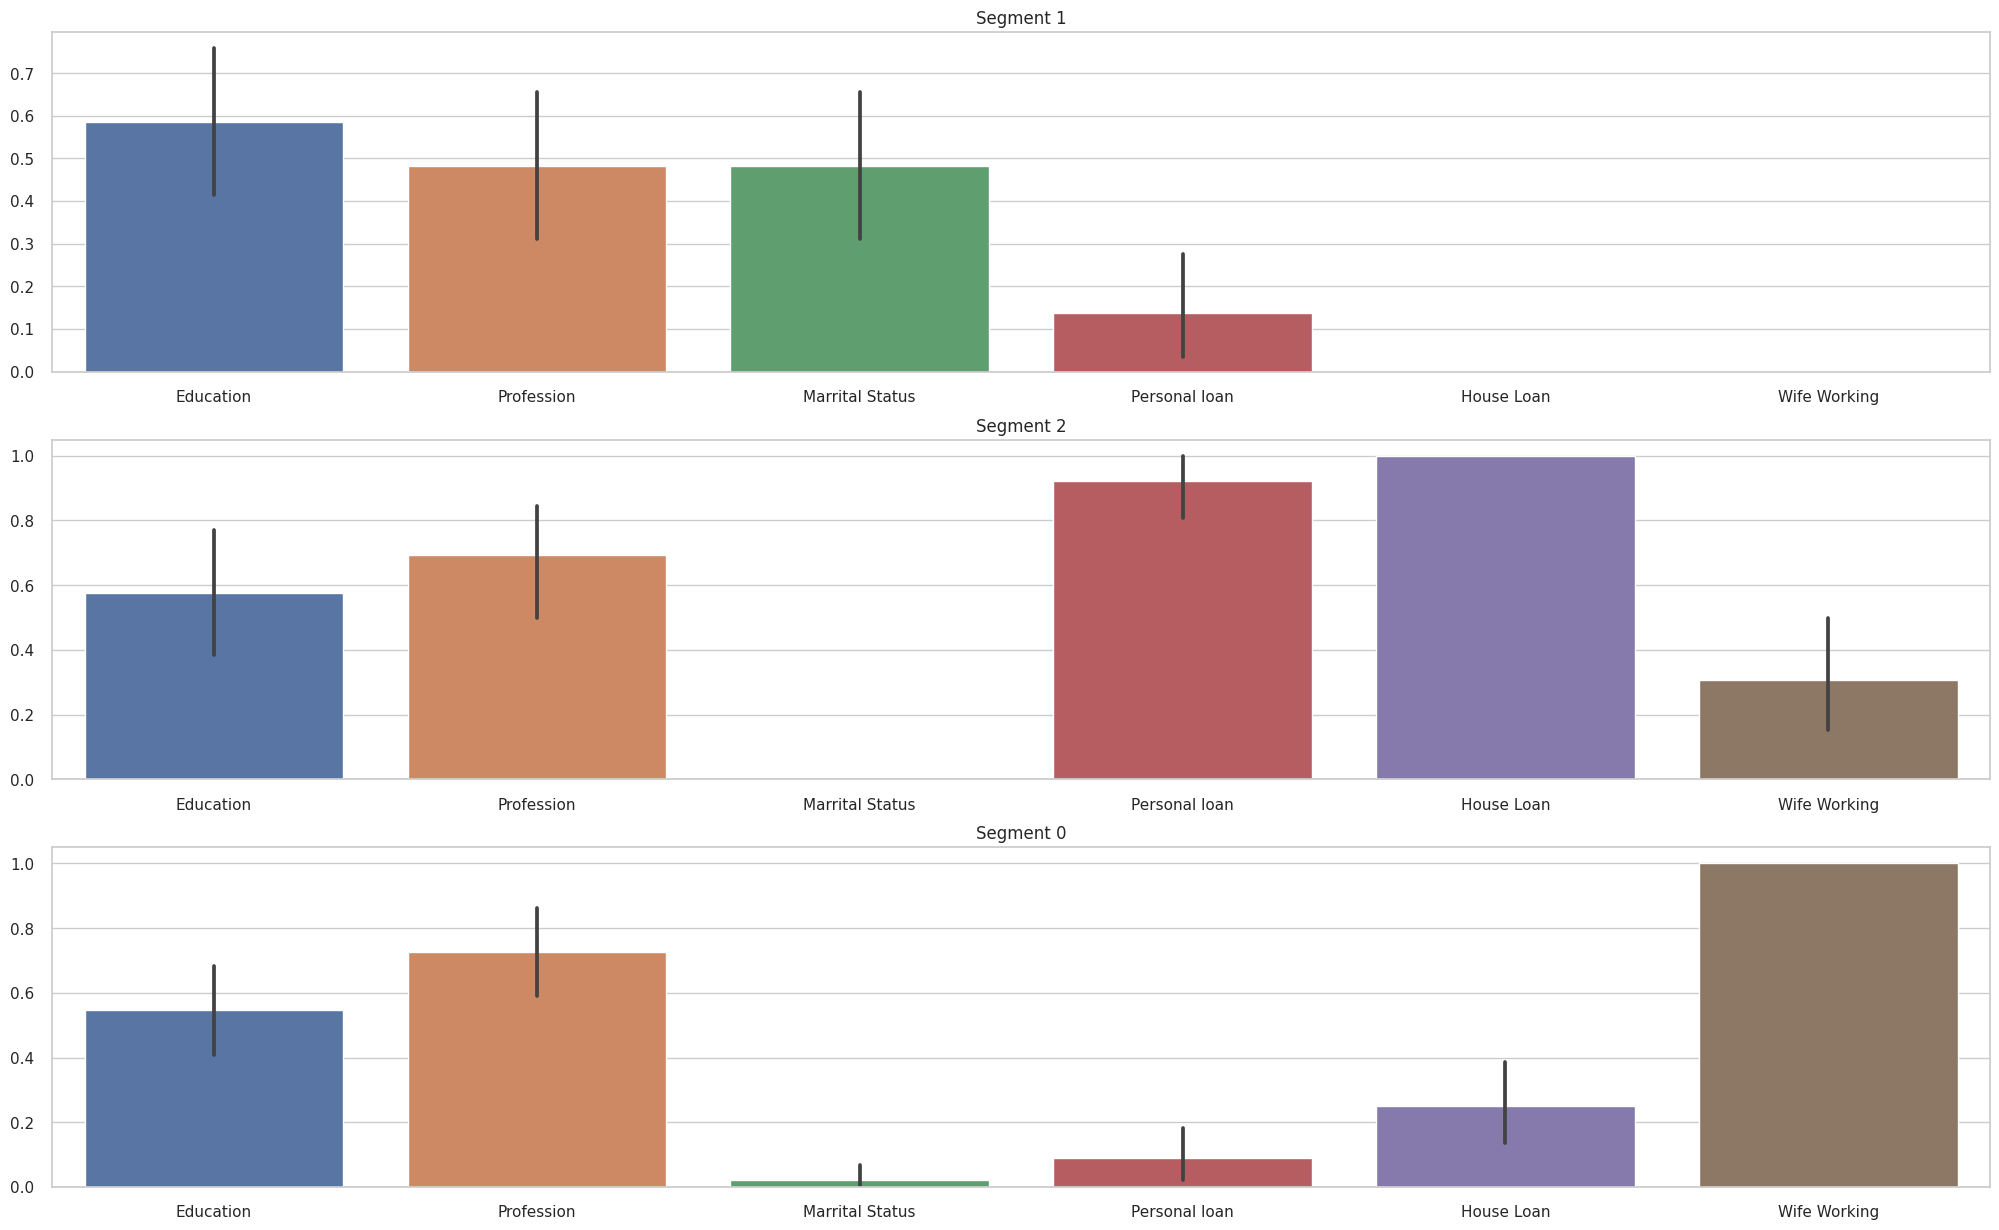

In [ ]:
sns.set(style="whitegrid")

# Create a 1x2 panel plot for two segments
nrows,ncols = 3,1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))

# Flatten axes to loop through them easily
axes_flat = axes.flatten()
segments1 = catg_df['cluster_num'].unique()

# Create a bar plot for each segment
for segment, ax in zip(segments1, axes_flat):
    segment_data = catg_df[catg_df['cluster_num'] == segment]
    sns.barplot(data=segment_data.iloc[:,:-1], ax=ax)
    ax.set_title(f'Segment {segment}')

# Adjust layout and show the plot

plt.show()

### **Segments Based on Social status :**


*   **Segment 0 : Highly Educated Salaried Professional with Working wife** :- <font color= 'red'> 44.4 %</font>

*   **Segment 1 :  Highly Educated, Salaried Single professional with little Personal Loan.** :- :- <font color= 'red'> 29.3 %</font>

*   **Segment 2 :   Post graduate, Salaried professional , which have High personal and home loans but also a working wife.** :- :- <font color= 'red'> 26.3 %</font>






In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
feature2= 	['Age', 'Salary','Wife Salary' ,'Total Salary','Price']
distance_matrix = np.array(num_df[feature2])
distance_matrix =distance_matrix .T
Z = linkage(distance_matrix, method='ward')  # 'ward' linkage uses Ward's minimum variance method

Z.shape

(4, 4)

In [ ]:
Ele2_x_T=num_df[feature2].T
Ele2_x_T.index.shape

(5,)

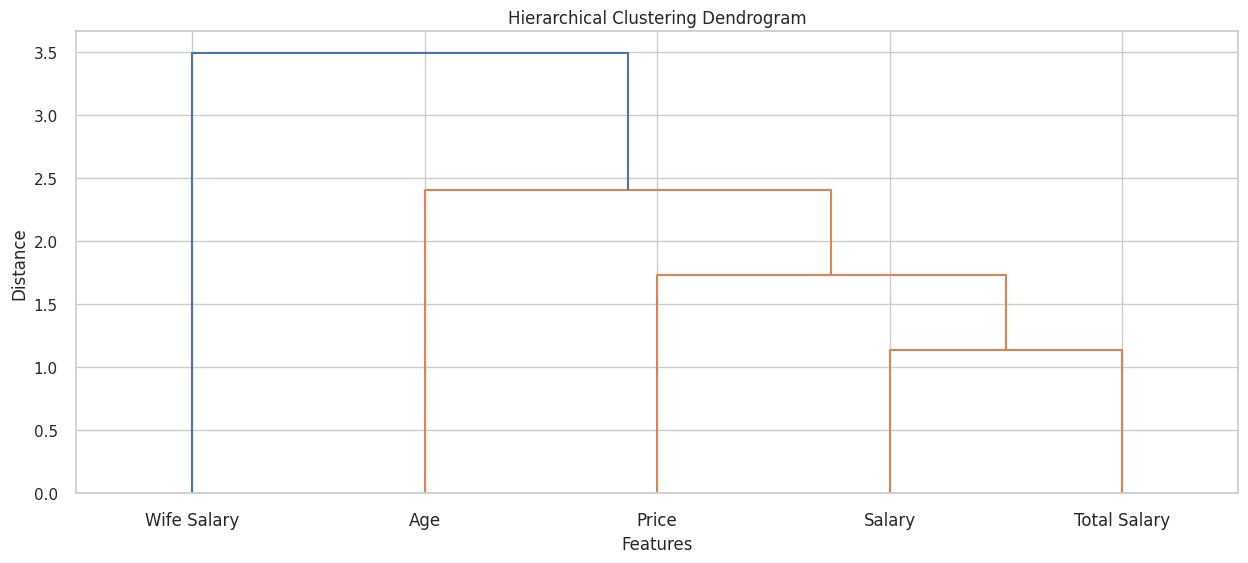

In [ ]:
plt.figure(figsize=(15, 6))
dendrogram(Z, labels=Ele2_x_T.index, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

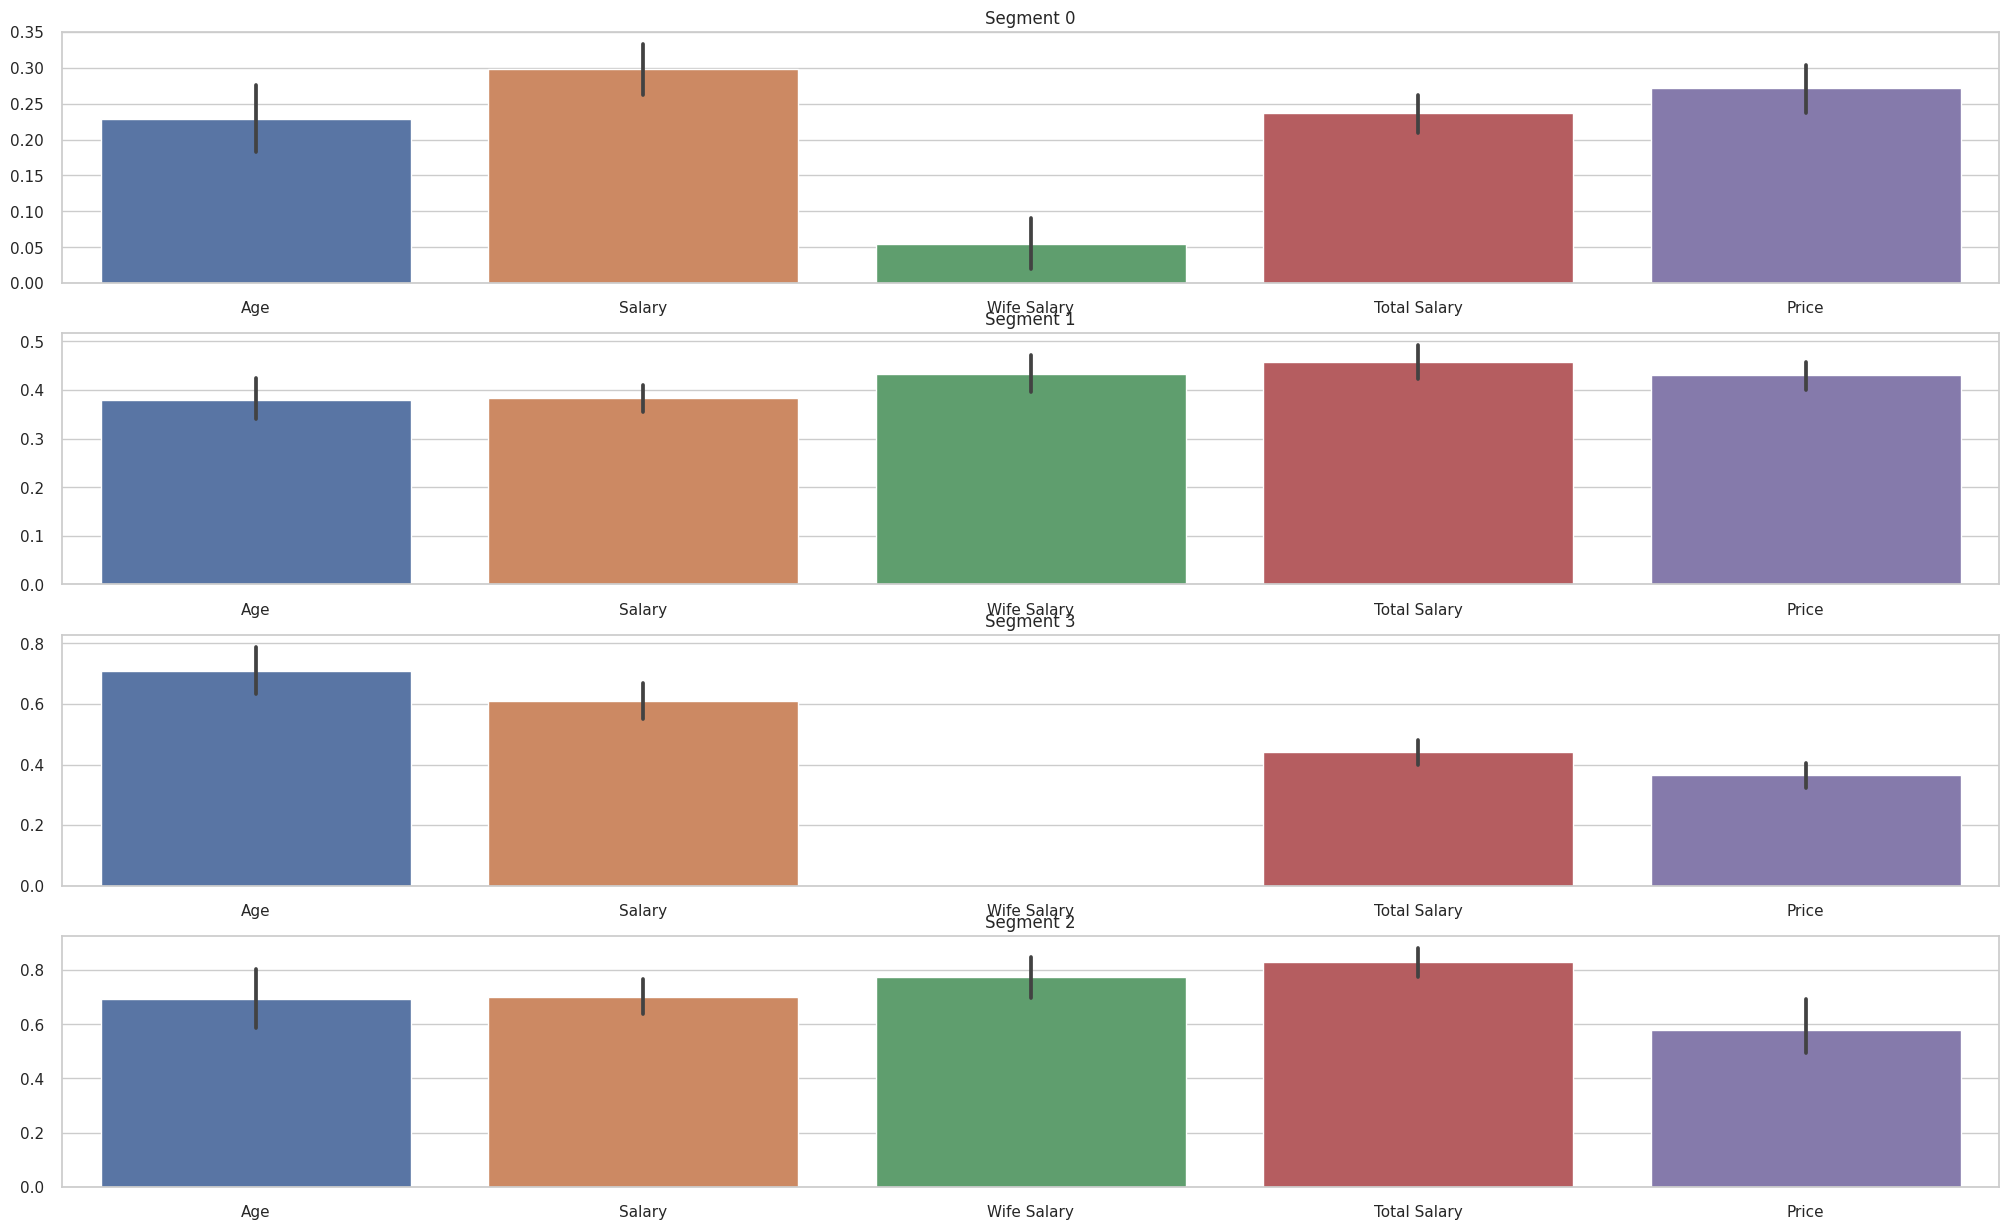

In [ ]:
sns.set(style="whitegrid")

# Create a 1x2 panel plot for two segments
nrows,ncols = 4,1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))

# Flatten axes to loop through them easily
axes_flat = axes.flatten()
segments2 = num_df['cluster_num'].unique()

# Create a bar plot for each segment
for segment, ax in zip(segments2, axes_flat):
    segment_data = num_df[num_df['cluster_num'] == segment]
    sns.barplot(data=segment_data.iloc[:,:-1], ax=ax)
    ax.set_title(f'Segment {segment}')

# Adjust layout and show the plot

plt.show()

In [ ]:
average_cluster_buy = catg_df.groupby('cluster_num')[feature1].mean()  # Social status
average_cluster_buy

,Education,Profession,Marrital Status,Personal loan,House Loan,Wife Working
cluster_num,,,,,,
0,0.545455,0.727273,0.022727,0.090909,0.25,1.000000
1,0.586207,0.482759,0.482759,0.137931,0.00,0.000000
2,0.576923,0.692308,0.000000,0.923077,1.00,0.307692


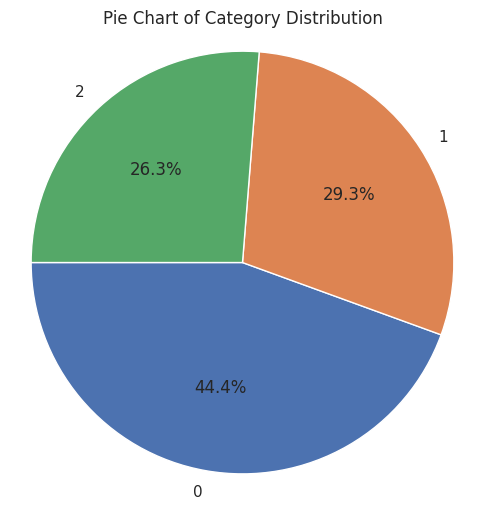

In [ ]:
cluster_counts1 = catg_df['cluster_num'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts1, labels=cluster_counts1.index, autopct='%1.1f%%', startangle=900)
plt.title('Pie Chart of Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
average_cluster_fin = num_df.groupby('cluster_num')[feature2].mean()   # Financial Status
average_cluster_fin

,Age,Salary,Wife Salary,Total Salary,Price
cluster_num,,,,,
0,0.228000,0.297917,0.054762,0.237500,0.271713
1,0.380000,0.382407,0.431746,0.456667,0.431373
2,0.692308,0.698718,0.772894,0.827692,0.576790
3,0.707500,0.611111,0.000000,0.440000,0.364187


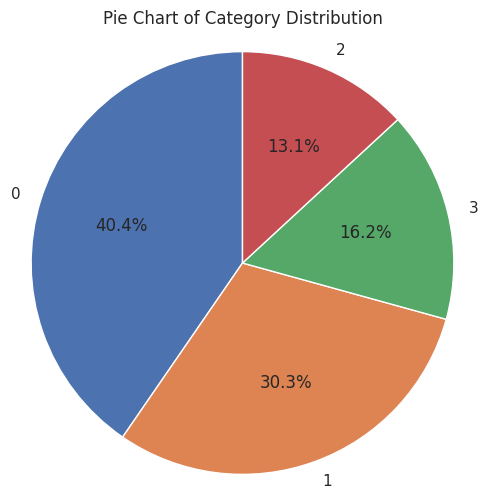

In [ ]:
cluster_counts2 = num_df['cluster_num'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts2, labels=cluster_counts2.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Segments Based on Financial status :**


*   **Segment 0 : Young age, Mid-level Total Salary Professional Looking for mid_range priced Car** :- <font color= 'red'> 40.4 %</font>

*   **Segment 1 :  People in their 30s,Above Average total Salary with Working wife  Looking for Higher Price ranged cars** :- <font color= 'red'> 30.3 %</font>

*   **Segment 2 :   People in their 40's,Lower range Salaried with High  wife's salary ,Looking for above mid range of Cars** :- <font color= 'red'> 13.1 %</font>

*  **Segment 3 : People in their 40's,Lower range Salaried with no wife's salary ,Looking for Cheaper range of Cars** :- <font color= 'red'> 16.2 %</font>


#  Q: WHat features should one offer in a EV SUv segment
Features of Most popular EV model based on reviews :-
**Tata Nexon EV**

In [ ]:
pd.set_option('display.max_rows', None)
elec_car_data_Nexon = elec_car_data[elec_car_data['Model']=='Nexon Ev']
elec_car_data_Nexon_cln= elec_car_data_Nexon.dropna(axis=1)
elec_car_data_Nexon_cln.T

,1006,1007,1008
Make,Tata,Tata,Tata
Model,Nexon Ev,Nexon Ev,Nexon Ev
Variant,Xm,Xz Plus,Xz Plus Lux
Ex-Showroom_Price,"Rs. 13,99,000","Rs. 14,99,000","Rs. 15,99,000"
Drivetrain,FWD (Front Wheel Drive),FWD (Front Wheel Drive),FWD (Front Wheel Drive)
Fuel_Type,Electric,Electric,Electric
Height,1607 mm,1607 mm,1607 mm
Length,3994 mm,3994 mm,3994 mm
Width,1811 mm,1811 mm,1811 mm
Body_Type,SUV,SUV,SUV
